In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
# here we are loading train data 
df1= pd.read_csv("/kaggle/input/titanic/train.csv")

In [3]:
# copy main data
df=df1.copy()

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df[["Age","Fare","SibSp","Parch"]].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000


In [9]:
# incomplete data detection
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Cat Features

- Comments on single variable

In [10]:
# Info of survivors and non-survivors
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [11]:
# Info of survivors and non-survivors
df_sinfo=df["Survived"].value_counts()
print("Survivors ",df_sinfo[1])
print("Non-survived:",df_sinfo[0])

Survivors  342
Non-survived: 549


In [12]:
# Percentage and graph of survivors and non-survivors
print(df["Survived"].value_counts(normalize=True))

0    0.616162
1    0.383838
Name: Survived, dtype: float64


Non-survived percentage : % 61.61616161616161
Survived percentage : % 38.38383838383838


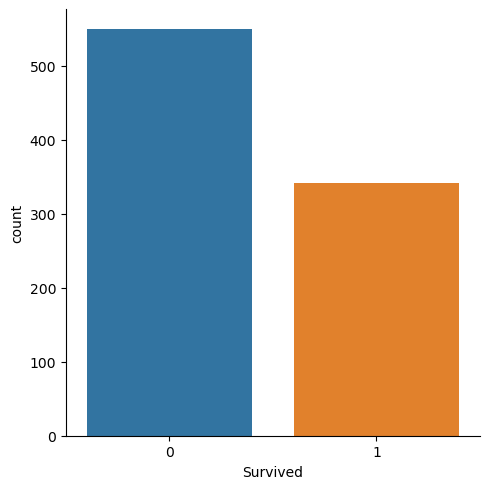

In [13]:
# Percentage and graph of survivors and non-survivors
df_percentage=df["Survived"].value_counts(normalize=True)*100
print("Non-survived percentage : %",df_percentage[0])
print("Survived percentage : %",df_percentage[1])

sns.catplot(x="Survived",kind="count",data=df)

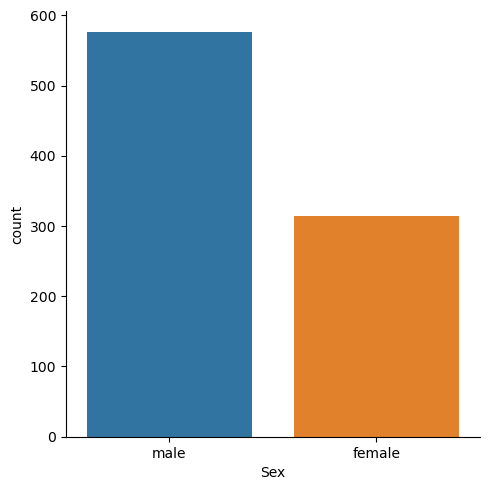

In [14]:
# gender
sns.catplot(x="Sex",kind="count",data=df)

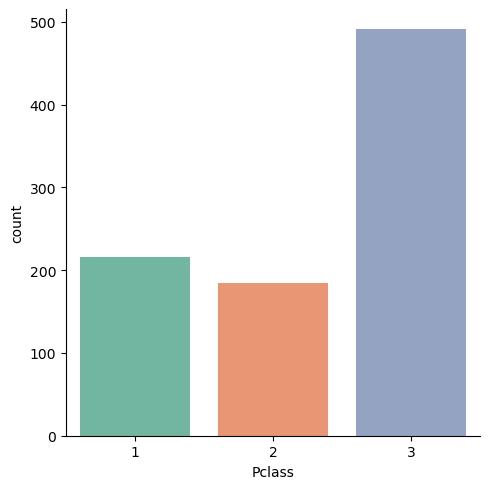

In [15]:
sns.catplot(x="Pclass",kind="count",data=df,palette="Set2")

0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: SibSp, dtype: float64


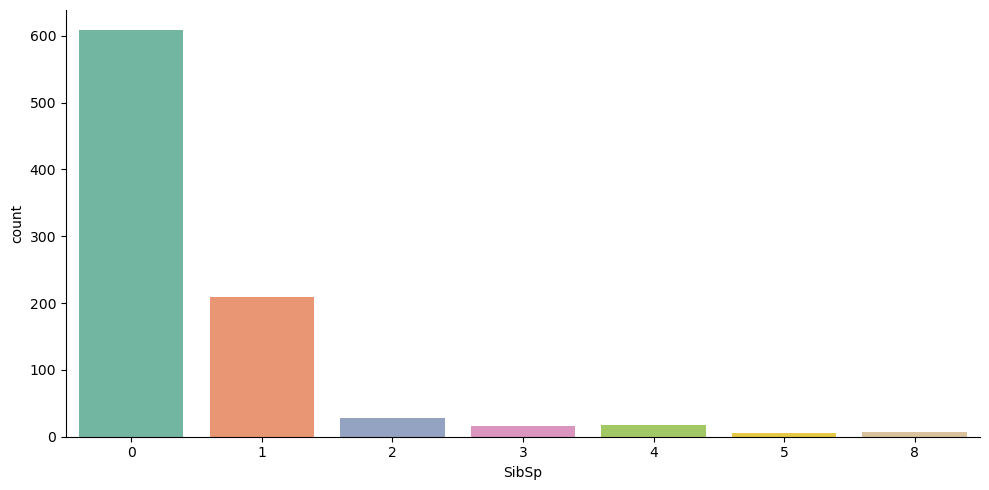

In [16]:
print(df["SibSp"].value_counts(normalize=True))
sns.catplot(x="SibSp",kind="count",data=df,palette="Set2",aspect=2)

- Comments on two variables


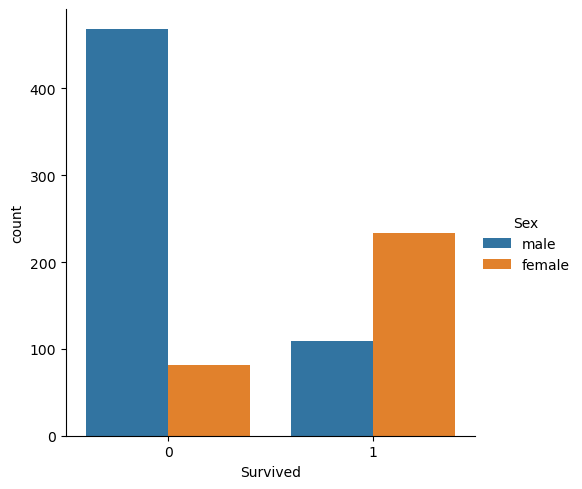

In [17]:
# As we see in the chart, the number of surviving women is more than the number of surviving men
sns.catplot(x="Survived",kind="count",data=df,hue="Sex")

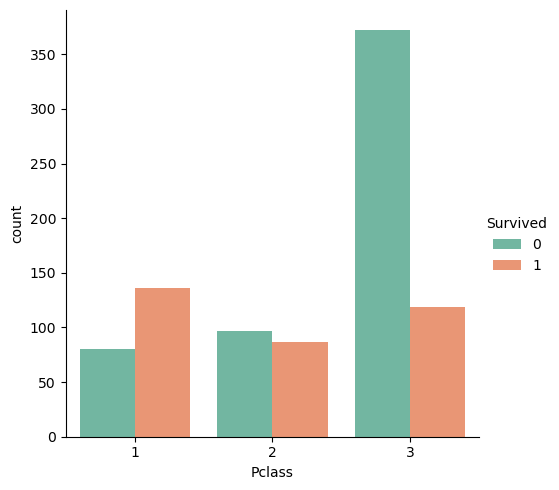

In [18]:
# first-class passengers survived more than second-class passengers and third-class passengers
sns.catplot(x="Pclass",kind="count",data=df,hue="Survived",palette="Set2")

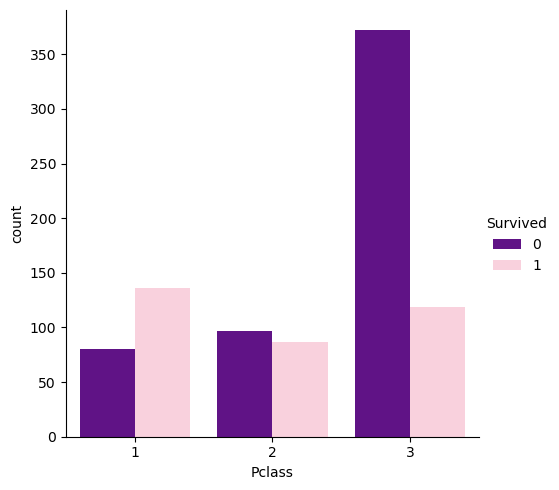

In [19]:
# we set colors ourselves with set_palette
my_palette=['#660099','#FFCBDB']
sns.set_palette(my_palette)

sns.catplot(x="Pclass",kind="count",hue="Survived", data=df)

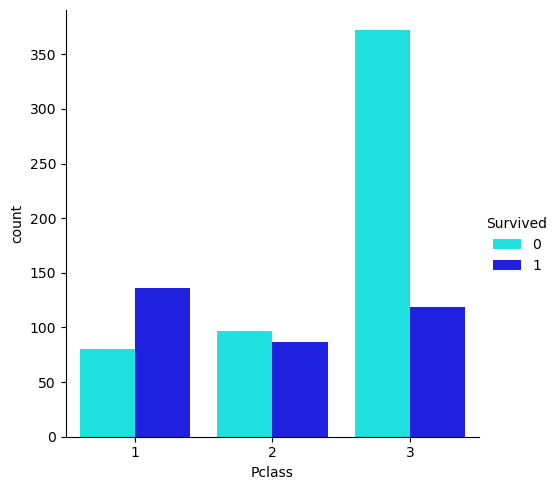

In [20]:
# we set colors ourselves with set_palette
custom_palette=['cyan','blue']
sns.set_palette(custom_palette)

sns.catplot(x="Pclass",kind="count",hue="Survived", data=df)

# Numeric variables

- Comments on single variable

<Axes: xlabel='Fare', ylabel='Density'>

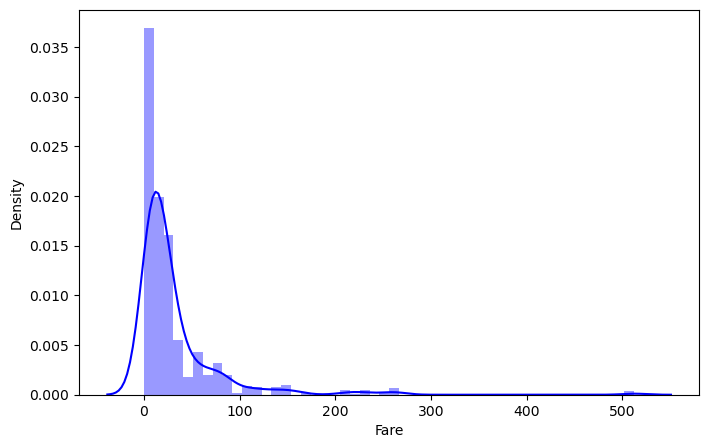

In [21]:
# charts can be extended with figsize
plt.figure(figsize=(8,5))
sns.distplot(df["Fare"],color="blue")

<Axes: xlabel='Fare', ylabel='Density'>

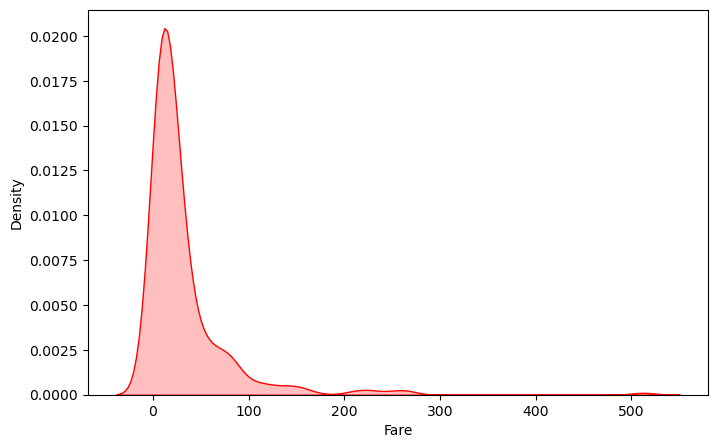

In [22]:
plt.figure(figsize=(8,5))
sns.kdeplot(df["Fare"],color="red",shade=True)

Text(0.5, 1.0, 'Fare Graphic')

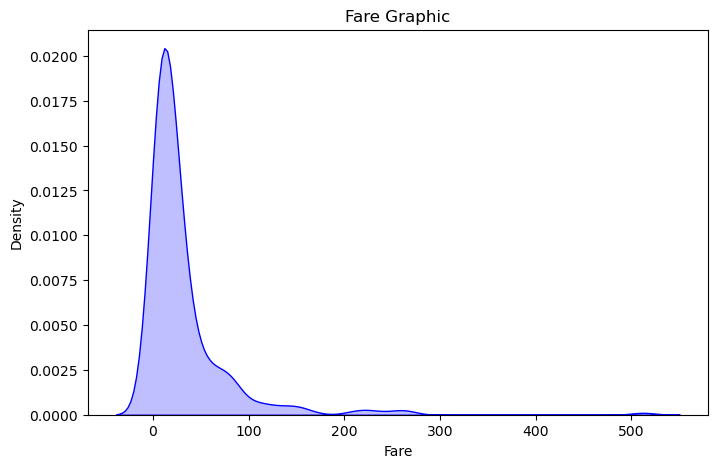

In [23]:
plt.figure(figsize=(8,5))
aw=sns.kdeplot(df["Fare"],color="blue",shade=True)
aw.set_title("Fare Graphic")

Text(0.5, 1.0, 'Age Graphic')

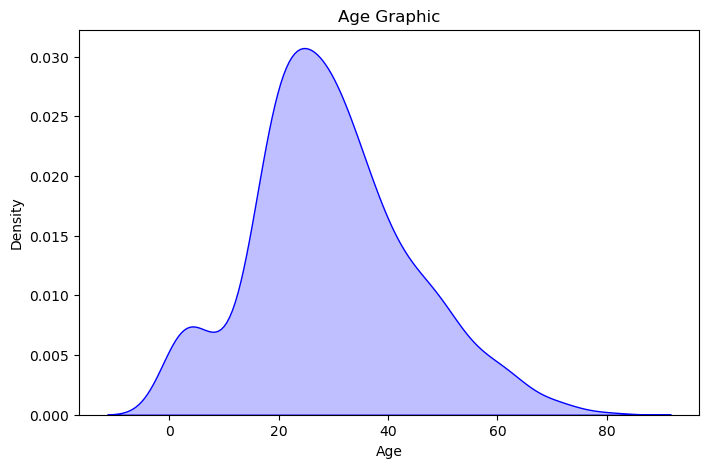

In [24]:
plt.figure(figsize=(8,5))
aw=sns.kdeplot(df["Age"],color="blue",shade=True)
aw.set_title("Age Graphic")

- Comments on two variables
- Let's examine the visual relationship between age and fare

Text(0.5, 1.0, 'Age vs Fare')

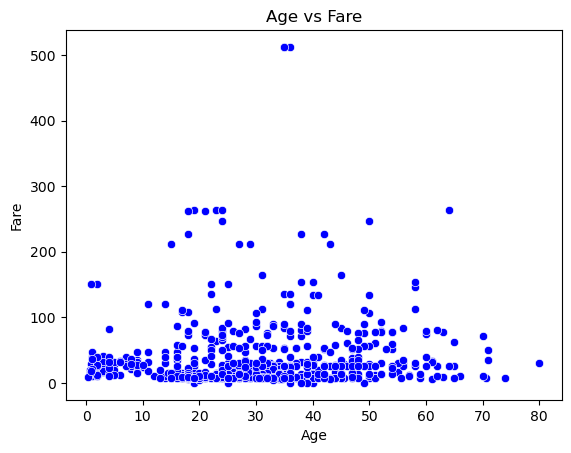

In [25]:
sns.scatterplot(x="Age",y="Fare",data=df,color="blue").set_title("Age vs Fare")

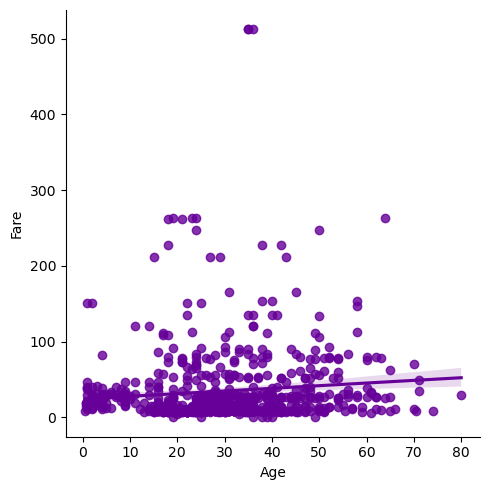

In [26]:
# Let's examine the linear relationship between age and fare
custom_palette=['#660099']
sns.set_palette(custom_palette)
sns.lmplot(x="Age",y="Fare",data=df,palette="Set3")

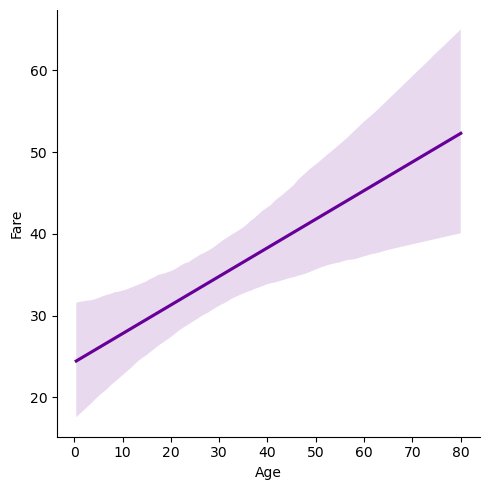

In [27]:
sns.lmplot(x="Age",y="Fare",data=df,palette="Set3",scatter=False)

<Axes: xlabel='Age', ylabel='Fare'>

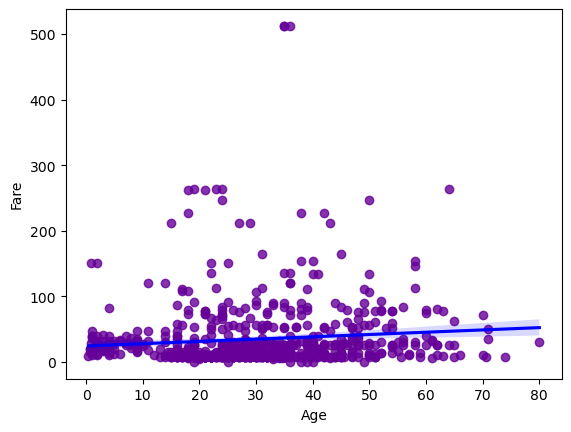

In [28]:
sns.regplot(x="Age",y="Fare",data=df,line_kws={"color": "blue"})

### Two numeric variables + one categoric variable

<Axes: xlabel='Age', ylabel='Fare'>

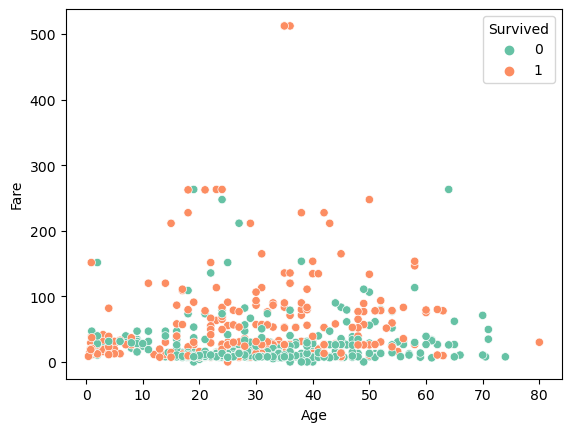

In [29]:
sns.scatterplot(x="Age",y="Fare",hue="Survived",data=df,palette="Set2")

In [30]:
# Fare averages of survivors and non-survivors
df.groupby("Survived")["Fare"].mean()

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

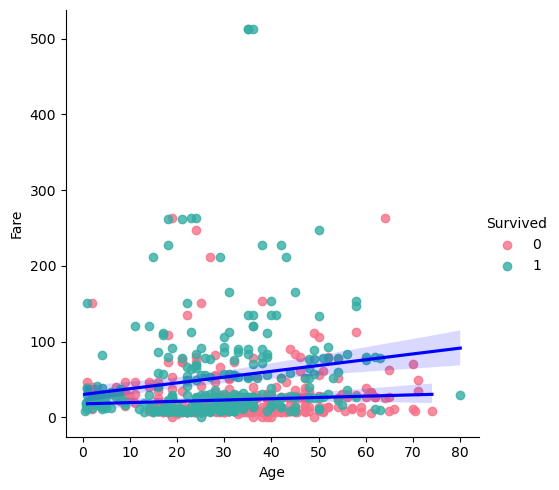

In [31]:
sns.lmplot(x="Age",y="Fare",hue="Survived",data=df,line_kws={"color": "blue"})

- to show outliers


<Axes: xlabel='Fare'>

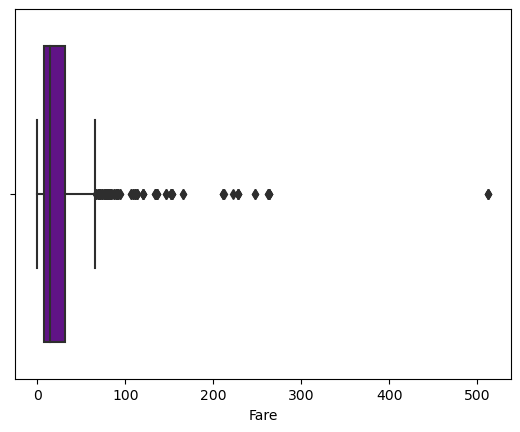

In [32]:
sns.boxplot(x="Fare", data=df)

In [33]:
# How many Fare values are over 300

df.loc[df["Fare"]>300].count()[0]

3

In [34]:
# How many Fare values are over 100

len(df.loc[df["Fare"]>100])

53

<Axes: xlabel='Survived', ylabel='Fare'>

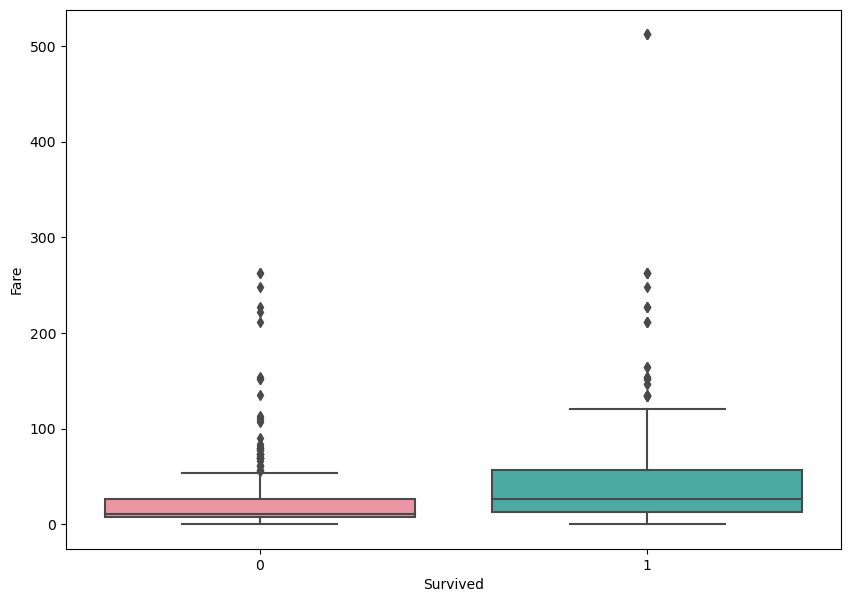

In [35]:
# Survivors' fare median more than non-survives
plt.figure(figsize=(10,7))
sns.boxplot(x="Survived",y="Fare", data=df)

<Axes: xlabel='Pclass', ylabel='Fare'>

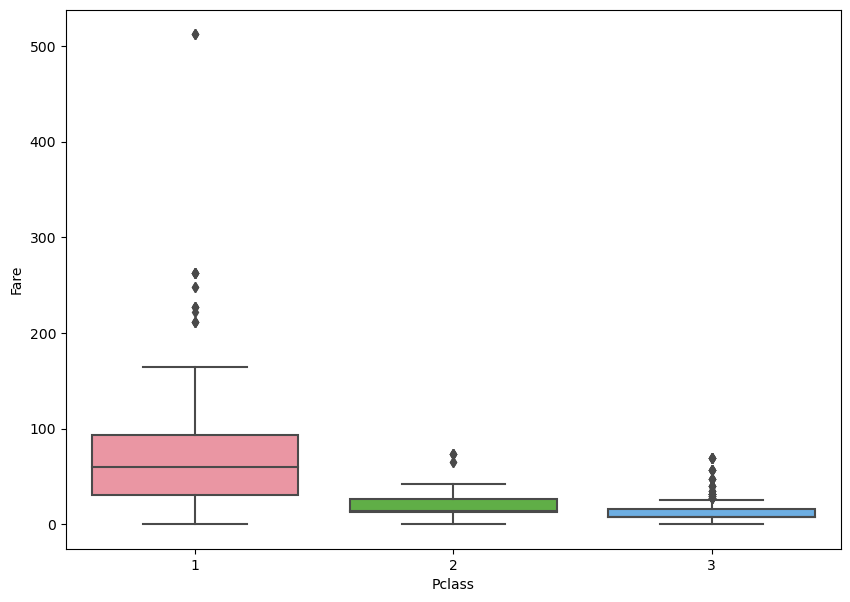

In [36]:
# 1.st class' fare median more than 2nd and 3rd
plt.figure(figsize=(10,7))
sns.boxplot(x="Pclass",y="Fare", data=df)

<Figure size 1000x700 with 0 Axes>

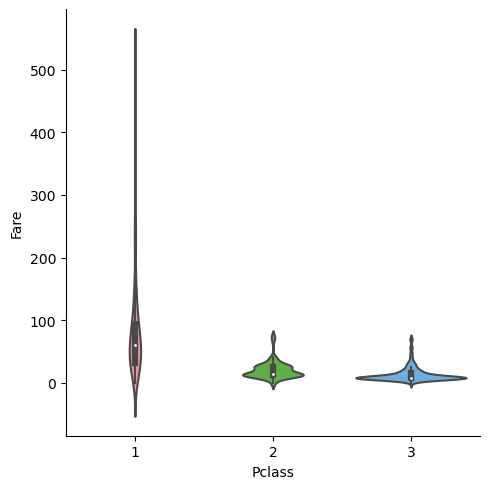

In [37]:
plt.figure(figsize=(10,7))
sns.catplot(x="Pclass",y="Fare",kind="violin", data=df,)

<Figure size 1000x700 with 0 Axes>

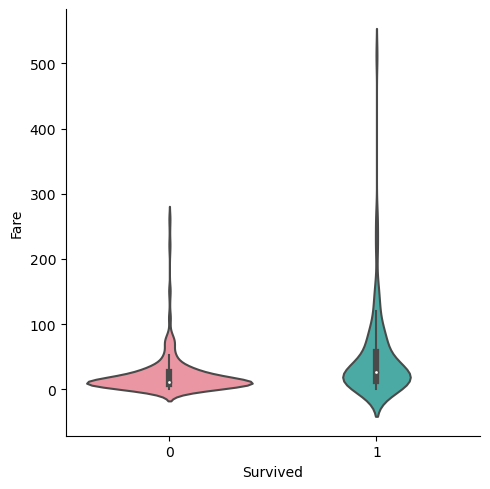

In [38]:
plt.figure(figsize=(10,7))
sns.catplot(x="Survived",y="Fare",kind="violin", data=df,)

In [39]:
df.groupby("Pclass")["Fare"].sum()

Pclass
1    18177.4125
2     3801.8417
3     6714.6951
Name: Fare, dtype: float64

# Representation of Ticket Sums According to PClass

In [40]:
# Representation of Ticket Sums According to PClass

money= df.groupby("Pclass",as_index=False)["Fare"].sum()
money

,Pclass,Fare
0,1,18177.4125
1,2,3801.8417
2,3,6714.6951


In [41]:
money=money.sort_values(by="Fare",ascending=False)
money

,Pclass,Fare
0,1,18177.4125
2,3,6714.6951
1,2,3801.8417


Text(0.5, 0.98, 'Pclass vs Fare')

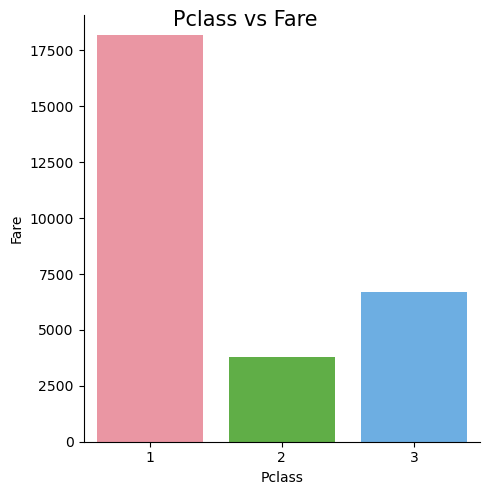

In [42]:
ax=sns.catplot(x="Pclass", y="Fare",data=money,kind="bar")
ax.fig.suptitle("Pclass vs Fare",size=15)

<Axes: xlabel='Pclass', ylabel='Fare'>

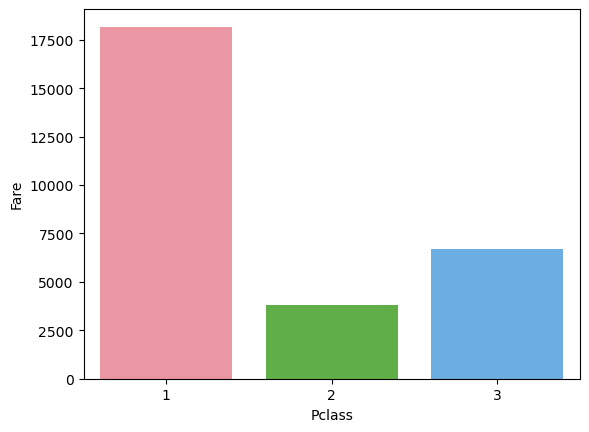

In [43]:
# barplot
sns.barplot(x="Pclass", y="Fare",data=money)

# Missing data

* Firstly, the percentage of missing data on a variable basis is examined.

* Methods to handle missing data:

 - Can be deleted (not recommended if there is no structural problem and the percentage of missing values is not too high).
- Can be filled with a value:
* Can be filled with 0.
* If it is a categorical variable, it can be filled with the mode, which is the most frequently occurring value.
* If it is a skewed numerical variable, it can be filled with the median; otherwise, it can be filled with the mean.
* Can be imputed using machine learning-based techniques (e.g., KNN Imputation).

In [44]:
# To access missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [45]:
df.shape

(891, 12)

In [46]:
177 / 891

0.19865319865319866

In [47]:
687/891

0.7710437710437711

In [48]:
# To delete missing values
df.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [49]:
# We permanently deleted the missing values. (inplace=True)
df1 = df.dropna()

In [50]:
df1.shape

(183, 12)

In [51]:
# The rows with missing values in the 'Age' column were removed
df_age= df.dropna(subset=["Age"])

<Axes: xlabel='Age', ylabel='Density'>

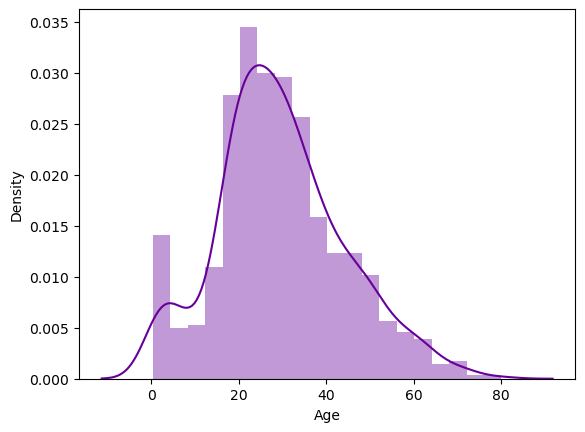

In [52]:
sns.distplot(df["Age"])

In [53]:
df["Age"].mean()

29.69911764705882

In [54]:
df["Age"].median()

28.0

In [55]:
# Filling with the mean

df["Age"]= df["Age"].fillna(df["Age"].mean())

In [56]:
# Filling with the mean

df["Age"]= df["Age"].fillna(df["Age"].median())

In [57]:
# Filling with the mod

df["Embarked"]= df["Embarked"].fillna(df["Embarked"].mode()[0])

In [58]:
df["Embarked"].mode()

0    S
Name: Embarked, dtype: object

# Visualizing Missing Data

In [59]:
#pip install missingno

<Axes: >

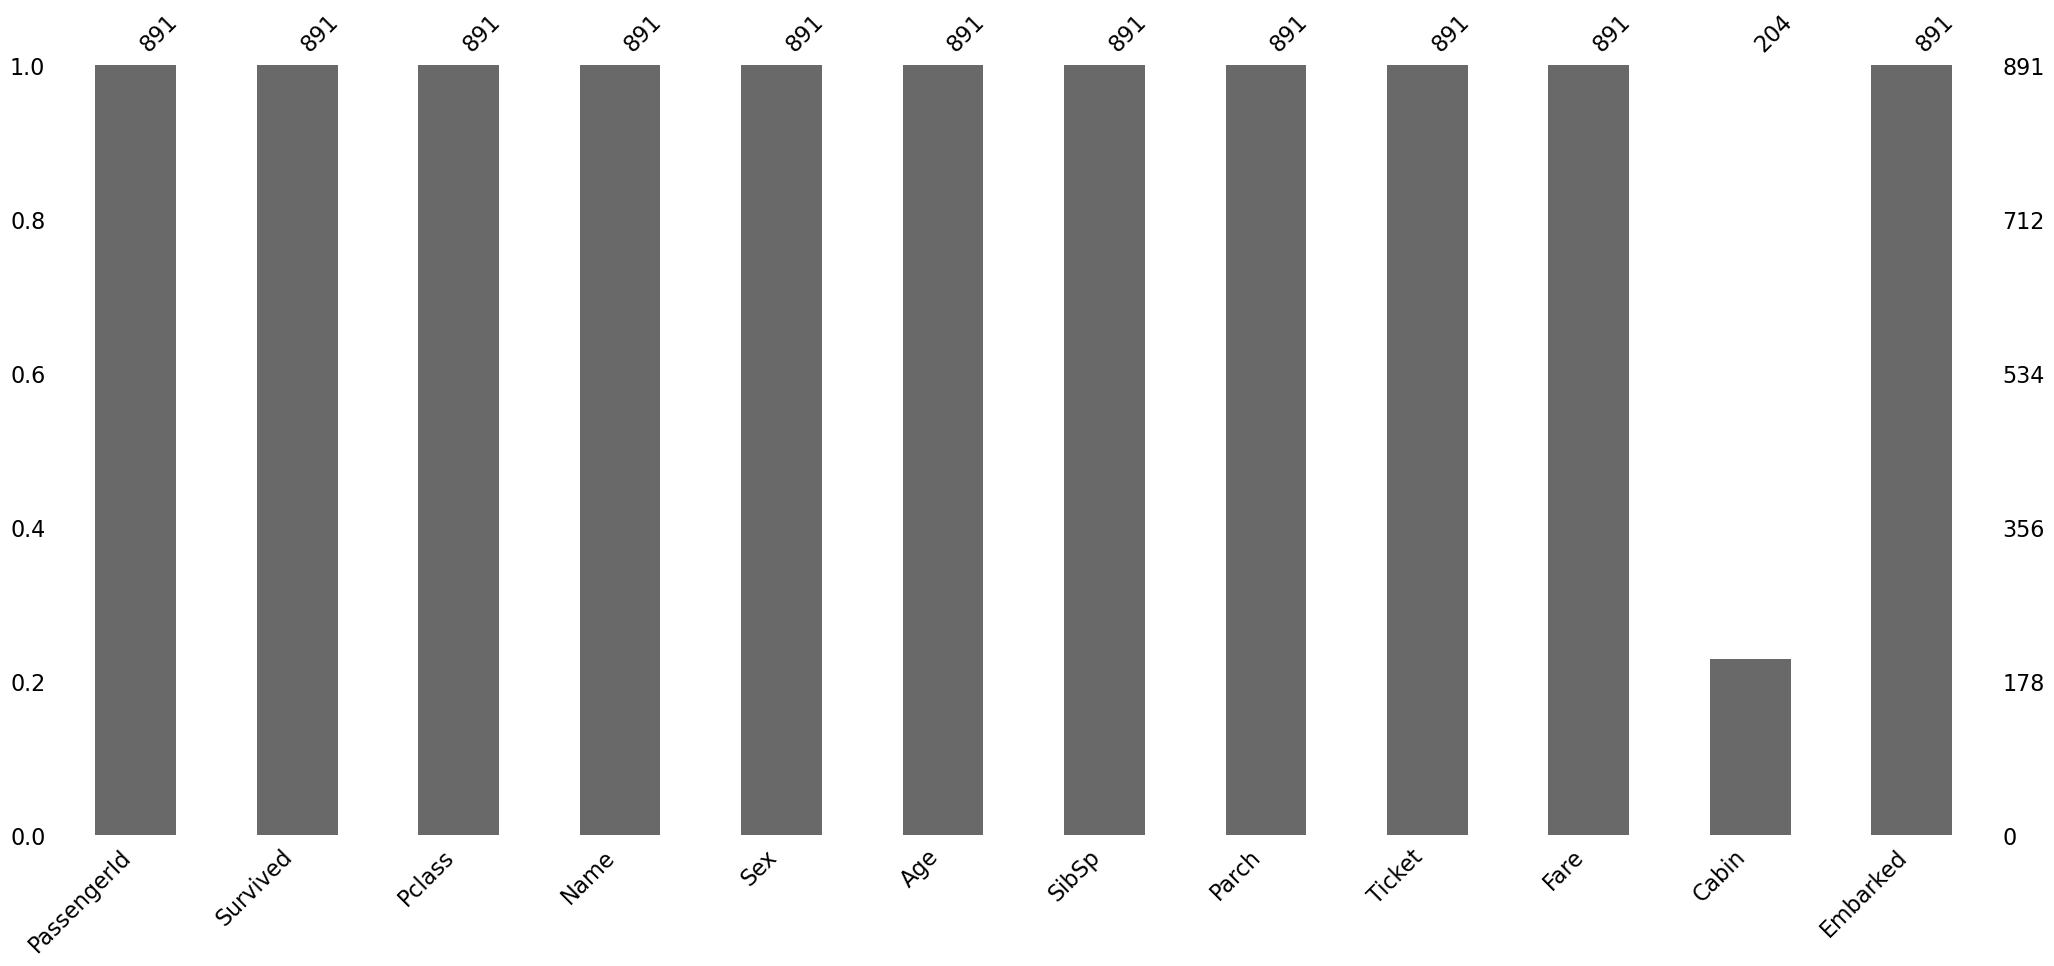

In [60]:
import missingno as msno
msno.bar(df)

<Axes: >

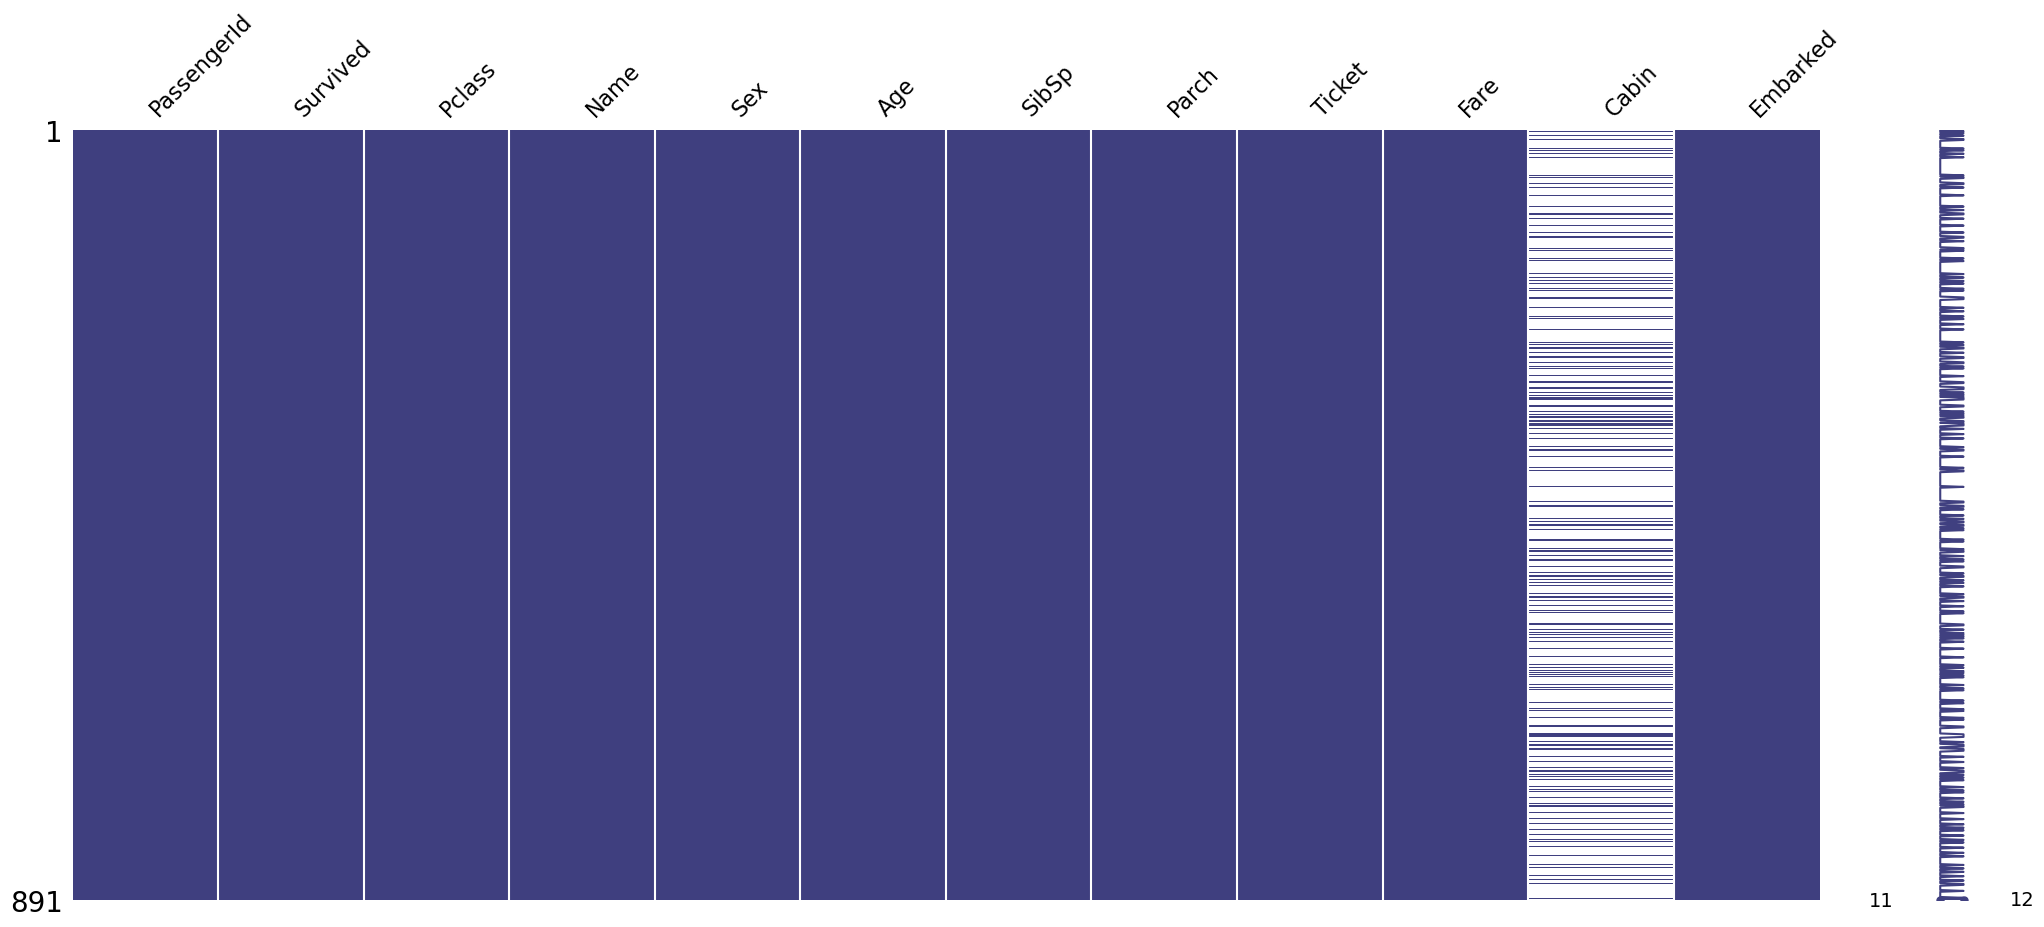

In [61]:
msno.matrix(df,color=(0.25, 0.25, 0.50))